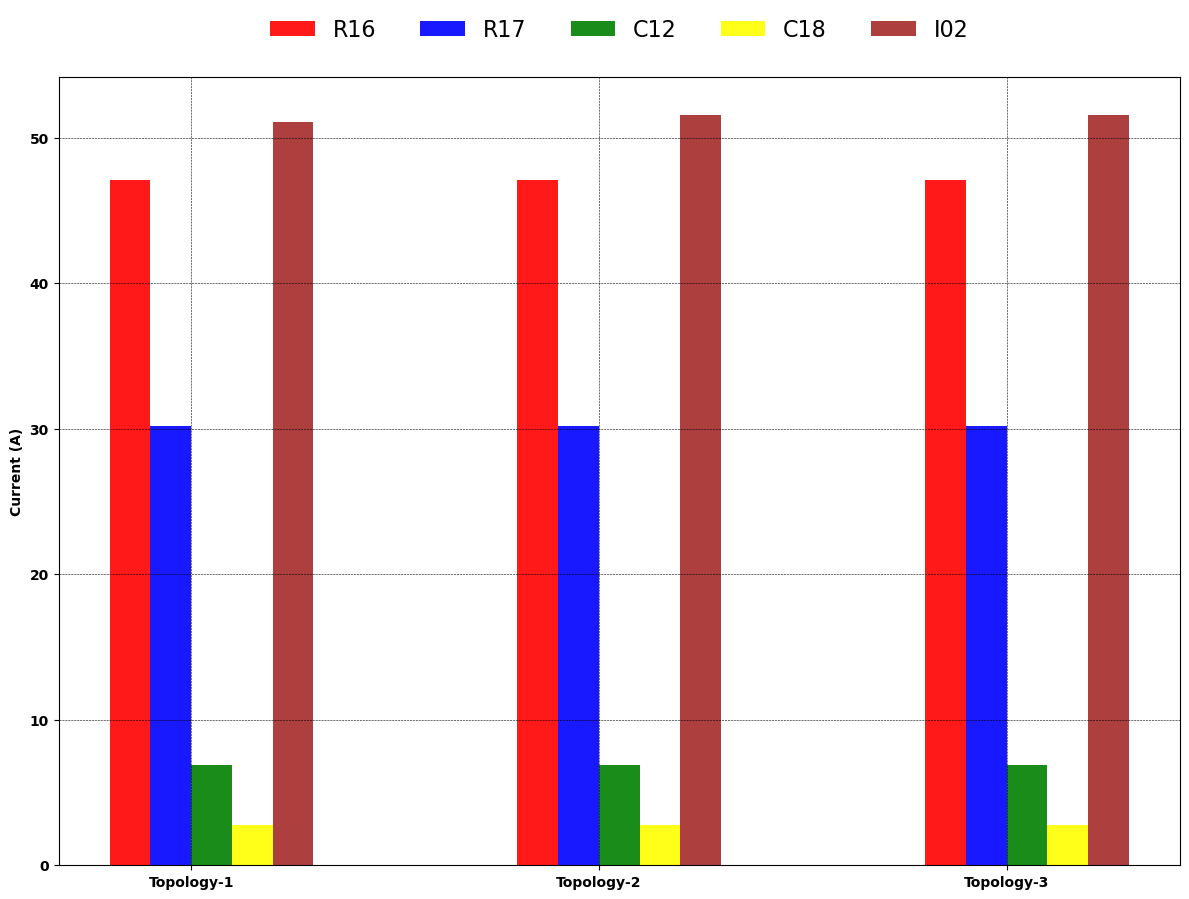

In [3]:
### Current at different Topologies Without Droop, Case-3, Phase-A

import matplotlib.pyplot as plt
import numpy as np

#################  R16     R17     C12    C18    I02       
topology_data = {
    'Topology-1': [47.078, 30.201, 6.924, 2.760, 51.082],
    'Topology-2': [47.078, 30.201, 6.924, 2.760, 51.585],
    'Topology-3': [47.078, 30.201, 6.924, 2.760, 51.585]
}

bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'I02': 'brown'
}

fig, ax = plt.subplots(figsize=(12, 9))
bar_width = 0.1
x_positions = np.arange(len(topology_data))

handles = []
labels = []

for i, (topology, measurements) in enumerate(topology_data.items()):
    for j, measurement in enumerate(measurements):
        bus_key = list(bus_colors.keys())[j]
        bar = ax.bar(x_positions[i] + j * bar_width, measurement, bar_width, color=bus_colors[bus_key], alpha=0.9)
        if i == 0:
            handles.append(bar)
            labels.append(bus_key)


ax.set_ylabel('Current (A)', fontweight='bold')
ax.set_xticks(x_positions + bar_width * 1.5)
ax.set_xticklabels(topology_data.keys(), fontweight='bold')

# Legend customization:  Moved to the top, with larger font size
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(bus_colors), frameon=False, prop={'size': 16}) #Increased font size here


ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

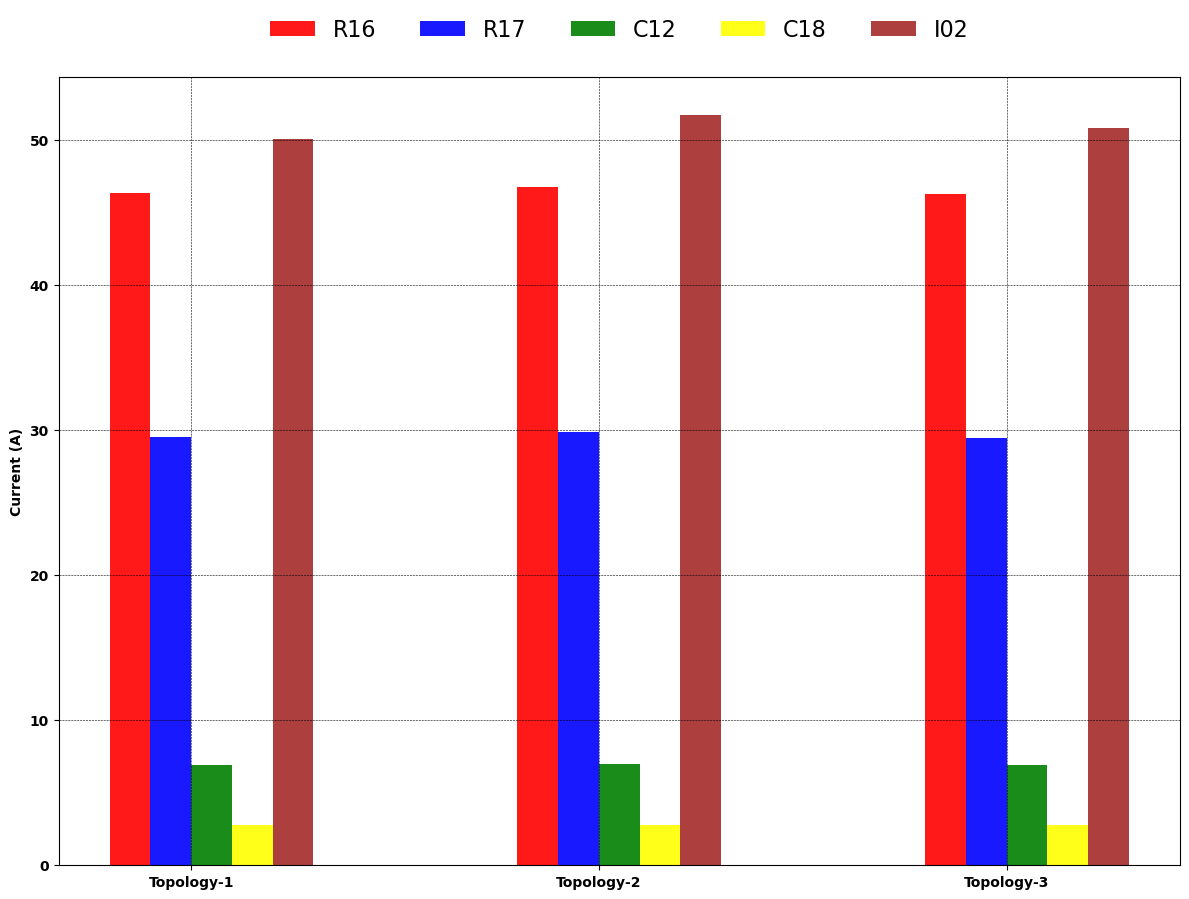

In [4]:
### Current at different Topologies With Droop, Case-3, Phase-A

import matplotlib.pyplot as plt
import numpy as np

#################  R16     R17     C12    C18    I02       
topology_data = {
    'Topology-1': [46.364, 29.486, 6.926, 2.760, 50.048],
    'Topology-2': [46.749, 29.886, 7.010, 2.792, 51.733],
    'Topology-3': [46.259, 29.450, 6.882, 2.748, 50.803]
}

bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'I02': 'brown'
}

fig, ax = plt.subplots(figsize=(12, 9))
bar_width = 0.1
x_positions = np.arange(len(topology_data))

handles = []
labels = []

for i, (topology, measurements) in enumerate(topology_data.items()):
    for j, measurement in enumerate(measurements):
        bus_key = list(bus_colors.keys())[j]
        bar = ax.bar(x_positions[i] + j * bar_width, measurement, bar_width, color=bus_colors[bus_key], alpha=0.9)
        if i == 0:
            handles.append(bar)
            labels.append(bus_key)


ax.set_ylabel('Current (A)', fontweight='bold')
ax.set_xticks(x_positions + bar_width * 1.5)
ax.set_xticklabels(topology_data.keys(), fontweight='bold')

# Legend customization:  Moved to the top, with larger font size
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(bus_colors), frameon=False, prop={'size': 16}) #Increased font size here


ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [ ]:
## Current without Droop, bar figure

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files. Include error handling.
phase_a_data = read_current_data('Current_phase_a_output_Without_Droop_Topology2.csv')
phase_b_data = read_current_data('Current_phase_b_output_Without_Droop_Topology2.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Dictionary to consolidate data from all phases for each bus.
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']
    bus_data[bus] = [row['Phase A Current (A)'], 0]  # Initialize with zero for phase B

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']


# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Plotting section
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents)
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels.
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    xticks.extend([x_positions[i] + bar_width * j for j in range(2)])
    xticklabels.extend(['A', 'B'])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 12})
ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

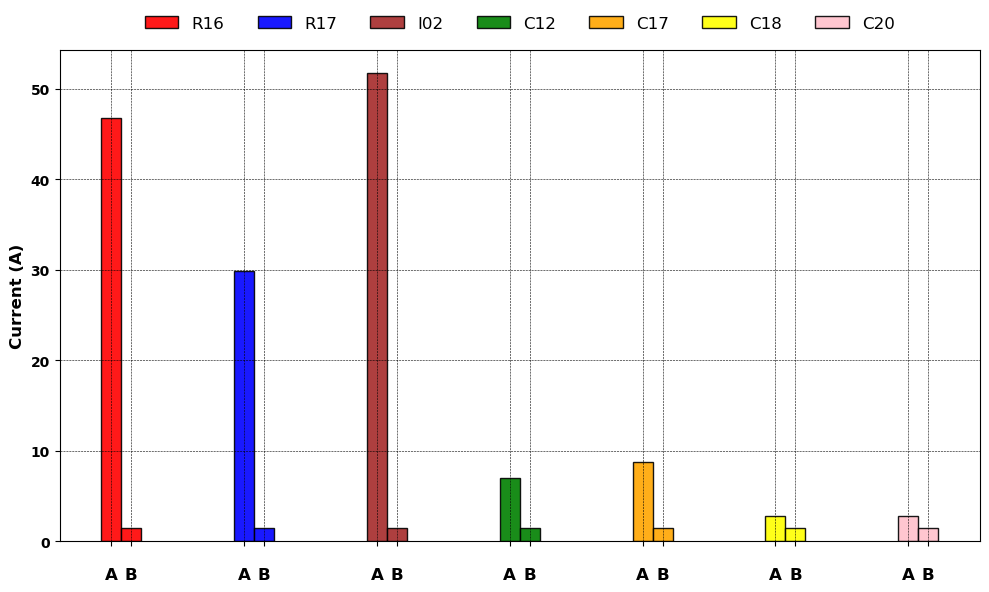

In [40]:
## Current with Droop, bar figure

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files. Include error handling.
phase_a_data = read_current_data('Current_phase_a_output_With_Droop_Topology2.csv')
phase_b_data = read_current_data('Current_phase_b_output_With_Droop_Topology2.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Create a dictionary to consolidate data from all phases for each bus.
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']
    bus_data[bus] = [row['Phase A Current (A)'], 0]

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']


# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Plotting section
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents) 
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels.
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    xticks.extend([x_positions[i] + bar_width * j for j in range(2)])
    xticklabels.extend(['A', 'B']) #only A and B

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 12})
ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

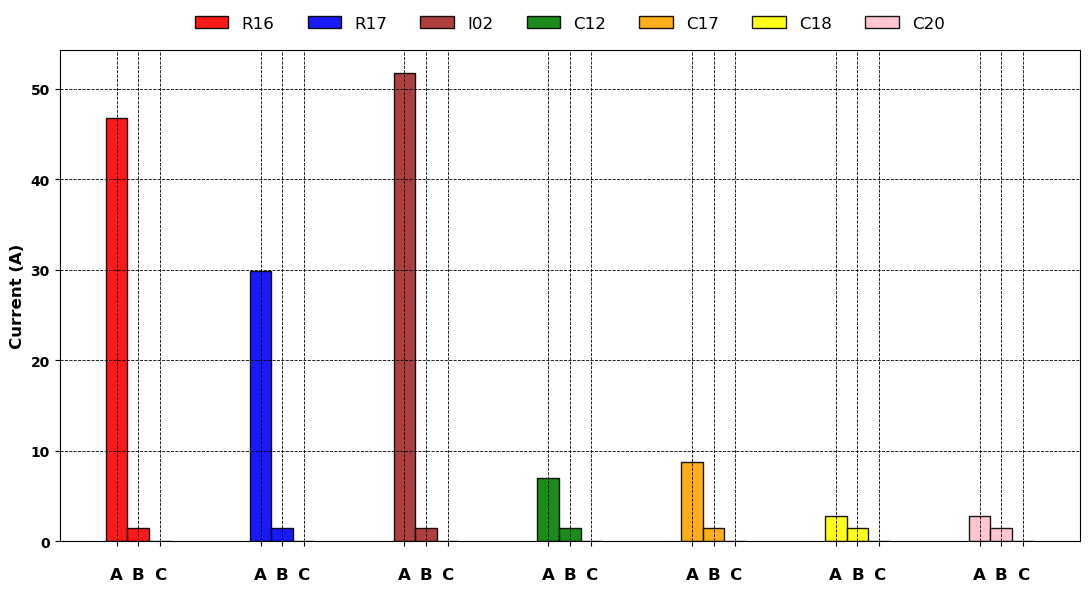

In [44]:
## Current with Droop phase A&B, neutral C later we can make it (N), bar figure

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files.
phase_a_data = read_current_data('Current_phase_a_output_With_Droop_Topology2.csv')
phase_b_data = read_current_data('Current_phase_b_output_With_Droop_Topology2.csv')
phase_c_data = read_current_data('Current_phase_c_output_With_Droop_Topology2.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None or phase_c_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Create a dictionary to consolidate data from all phases for each bus
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']  # CSV has a 'Bus' column
    bus_data[bus] = [row['Phase A Current (A)'], 0, 0]  # Initialize with zeros for phases B and C

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']

for index, row in phase_c_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][2] = row['Phase C Current (A)']

# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']   # Example
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Plotting section
fig, ax = plt.subplots(figsize=(11, 6))
bar_width = 0.15
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents)
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    num_phases = len(list(plot_data.values())[i])
    xticks.extend([x_positions[i] + bar_width * j for j in range(num_phases)])
    xticklabels.extend([chr(65 + j) for j in range(num_phases)])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 12})
ax.grid(True, which='both', linestyle='--', linewidth=0.6, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [ ]:
### End

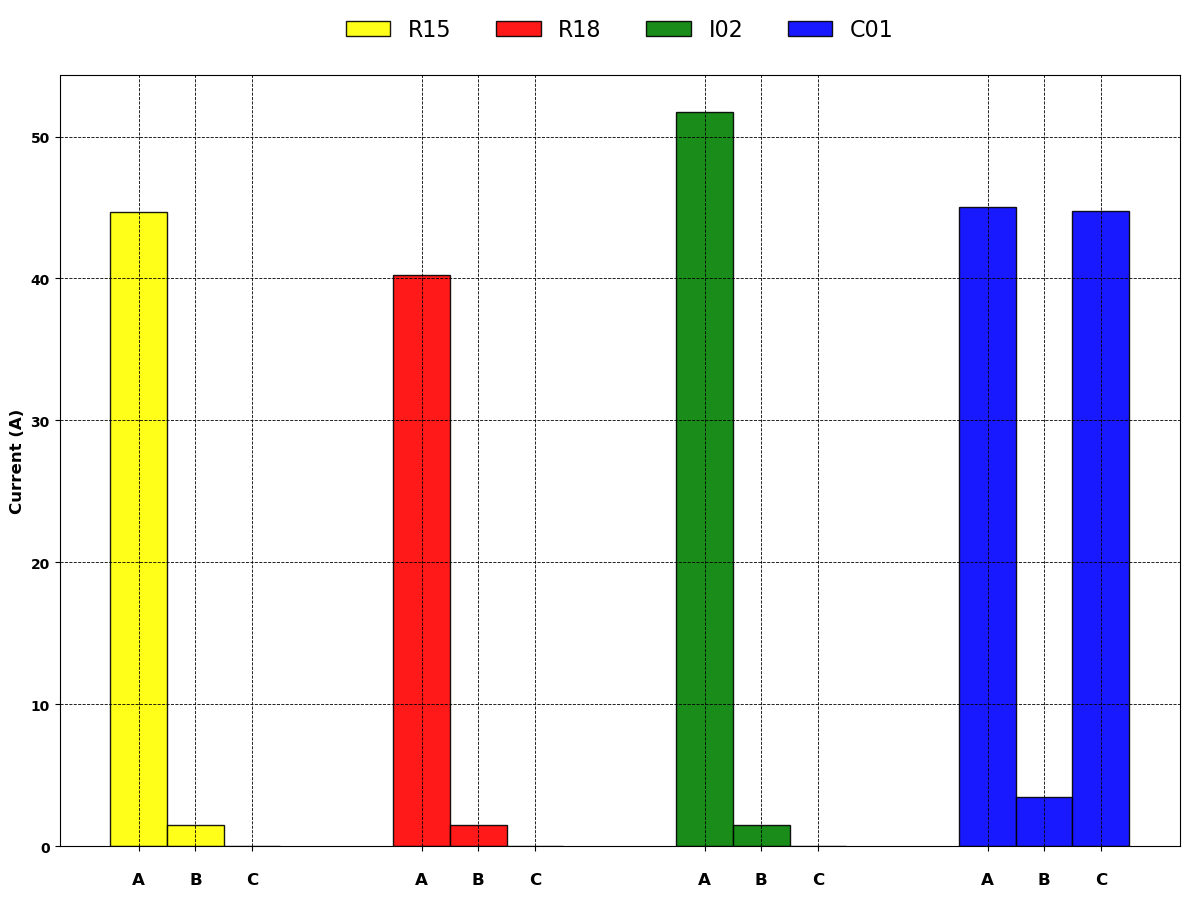

In [30]:
## Current with Droop phase A&B, neutral C, bar figure

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files. Include error handling.
phase_a_data = read_current_data('Current_phase_a_output_With_Droop_Topology2.csv')
phase_b_data = read_current_data('Current_phase_b_output_With_Droop_Topology2.csv')
phase_c_data = read_current_data('Current_phase_c_output_With_Droop_Topology2.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None or phase_c_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Create a dictionary to consolidate data from all phases for each bus
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']  # Assumes your CSV has a 'Bus' column
    bus_data[bus] = [row['Phase A Current (A)'], 0, 0]  # Initialize with zeros for phases B and C

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']

for index, row in phase_c_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][2] = row['Phase C Current (A)']

# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R18', 'C01', 'I02', 'R15']  # Example
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R18': 'red',
    'C01': 'blue',
    'I02': 'green',
    'R15': 'yellow'
}

# Plotting section
fig, ax = plt.subplots(figsize=(12, 9))
bar_width = 0.2
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents)
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    num_phases = len(list(plot_data.values())[i])
    xticks.extend([x_positions[i] + bar_width * j for j in range(num_phases)])
    xticklabels.extend([chr(65 + j) for j in range(num_phases)])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 16})
ax.grid(True, which='both', linestyle='--', linewidth=0.6, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_25292\3130637789.py:54: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontweight('bold')


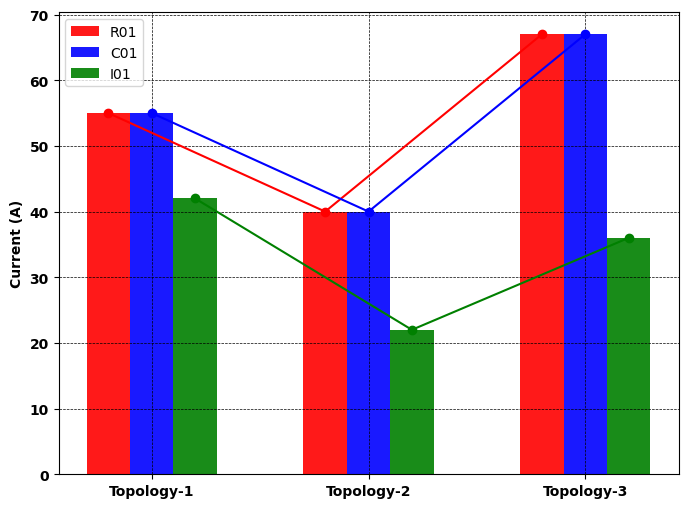

In [45]:
import matplotlib.pyplot as plt
import numpy as np

bus_data = {
    'R01': [55, 40, 67],
    'C01': [55, 40, 67],
    'I01': [42, 22, 36]
}

topology_colors = {'Topology-1': 'red', 'Topology-2': 'blue', 'Topology-3': 'green'}

bus_topology_mapping = {
    'R01': 'Topology-1',
    'C01': 'Topology-2',
    'I01': 'Topology-3'
}

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.2
index = np.arange(len(bus_data))

bar_info = {}

for i, (bus, currents) in enumerate(bus_data.items()):
    topology_name = bus_topology_mapping.get(bus)
    if topology_name:
        color = topology_colors.get(topology_name, 'gray')
        bars = ax.bar(index + i * bar_width, currents, bar_width, label=bus, color=color, alpha=0.9)
        bar_info[bus] = bars
    else:
        print(f"Topology not found for {bus}. Defaulting to 'gray' color.")
        bars = ax.bar(index + i * bar_width, currents, bar_width, label=bus, color='gray', alpha=0.9)
        bar_info[bus] = bars

#ax.set_xlabel('Topologies', fontweight='bold')
ax.set_ylabel('Current (A)', fontweight='bold')
ax.set_xticks(index + 0.2)
ax.set_xticklabels(['Topology-1', 'Topology-2', 'Topology-3'], fontweight='bold') # X-axis numbers bold

ax.legend()

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='black')

for bus, bars in bar_info.items():
    topology_name = bus_topology_mapping.get(bus)
    color = topology_colors.get(topology_name, 'gray')
    x_coords = [rect.get_x() + rect.get_width()/2 for rect in bars]
    y_coords = [rect.get_height() for rect in bars]
    ax.plot(x_coords, y_coords, marker='o', linestyle='-', color=color, label=f'{bus} Line')

#Make y-axis numbers bold
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')

plt.show()

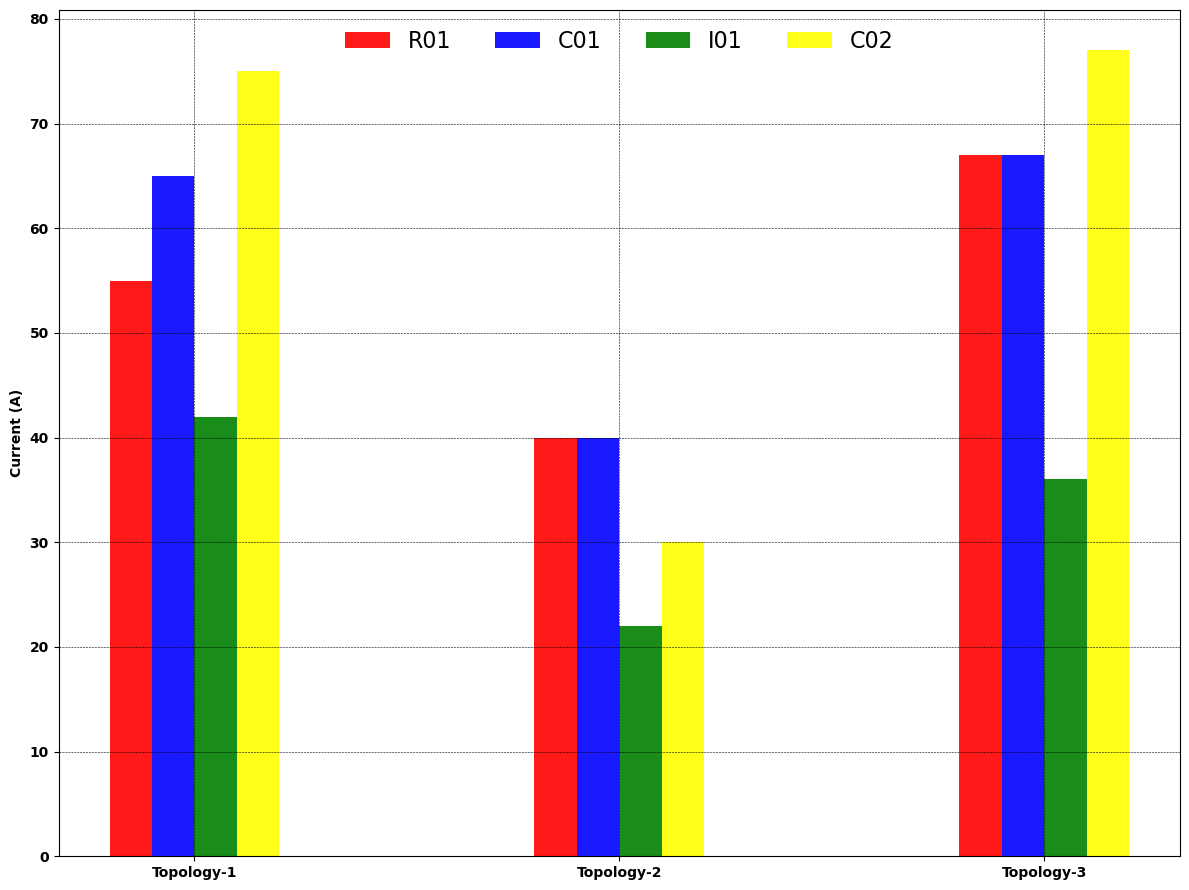

In [46]:
import matplotlib.pyplot as plt
import numpy as np

topology_data = {
    'Topology-1': [55, 65, 42, 75],
    'Topology-2': [40, 40, 22, 30],
    'Topology-3': [67, 67, 36, 77]
}

bus_colors = {
    'R01': 'red',
    'C01': 'blue',
    'I01': 'green',
    'C02': 'yellow'
}

fig, ax = plt.subplots(figsize=(12, 9))
bar_width = 0.1
x_positions = np.arange(len(topology_data))

handles = []
labels = []

for i, (topology, measurements) in enumerate(topology_data.items()):
    for j, measurement in enumerate(measurements):
        bus_key = list(bus_colors.keys())[j]
        bar = ax.bar(x_positions[i] + j * bar_width, measurement, bar_width, color=bus_colors[bus_key], alpha=0.9)
        if i == 0:
            handles.append(bar)
            labels.append(bus_key)


ax.set_ylabel('Current (A)', fontweight='bold')
ax.set_xticks(x_positions + bar_width * 1.5)
ax.set_xticklabels(topology_data.keys(), fontweight='bold')

# Legend customization:  Moved to the top, with larger font size
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(bus_colors), frameon=False, prop={'size': 16}) #Increased font size here


ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()